# Investigation the artifact effect of Tor's note

In this document, we try to understand that why profile B in Tor's note do not feel exhibite boundary artifact. For EM scheme, We will use the function : $$f(Z, dt):==\frac{-(Z + Drift(Z)dt)}{Diffu(Z)}=dW $$ to find the maxmium dW to reach the boundary for Z near the boundary. And then, we will compare the probability density function of dW ~ N(0, dt) to see how like get the maximum dW or less (Remember that dW is negative).

In [1]:
import numpy as np
import datetime
import threading
import multiprocessing as mp
from matplotlib import pyplot as plt
from time import time
from scipy.stats import norm
%matplotlib inline
plt.style.use('bmh')

## Diffusivity profile

In [2]:
import sympy
z = sympy.symbols('z')
dt = sympy.symbols('dt')
K0 = sympy.symbols("K0")
K1 = 6e-3  # m / s
Aalpha = 0.5
w = 0

sym_Diffu = K0 + K1 * z * sympy.exp(-Aalpha * z)
sym_dKdz = sympy.diff(sym_Diffu, z, 1)
sym_Beta = sympy.sqrt(2 * sym_Diffu)
sym_dBdz = sympy.diff(sym_Beta, z, 1)
sym_ddBdzz = sympy.diff(sym_Beta, z, 2)
sym_Alpha = w + sym_dKdz
sym_dAdz = sympy.diff(sym_Alpha, z, 1)
sym_ddAdzz = sympy.diff(sym_Alpha, z, 2)
sym_dABdz = sympy.diff(sym_Alpha * sym_Beta, z, 1)
sym_F = -(z + sym_Alpha * dt) / sym_Beta
sym_dFdz = sympy.diff(sym_F, z, 1)
sym_F_const = -(z) / sympy.sqrt(2 * 3e-3)
sym_dFdz_const = sympy.diff(sym_F_const, z, 1)

Diffu = sympy.utilities.lambdify([z, K0], sym_Diffu, np)
dKdz = sympy.utilities.lambdify([z, K0], sym_dKdz, np)
Beta = sympy.utilities.lambdify([z, K0], sym_Beta, np)
dBdz = sympy.utilities.lambdify([z, K0], sym_dBdz, np)
ddBdzz = sympy.utilities.lambdify([z, K0], sym_ddBdzz, np)
Alpha = sympy.utilities.lambdify([z, K0], sym_Alpha, np)
dAdz = sympy.utilities.lambdify([z, K0], sym_dAdz, np)
ddAdzz = sympy.utilities.lambdify([z, K0], sym_ddAdzz, np)
dABdz = sympy.utilities.lambdify([z, K0], sym_Alpha * sym_Beta, np)
F = sympy.utilities.lambdify([z, K0 ,dt], sym_F, np)
dFdz = sympy.utilities.lambdify([z, K0, dt], sym_dFdz, np)
F_const = sympy.utilities.lambdify([z, K0, dt], sym_F_const, np)
dFdz_const = sympy.utilities.lambdify([z, K0, dt], sym_dFdz_const, np)
del z, dt, K0

(0, 0.001)

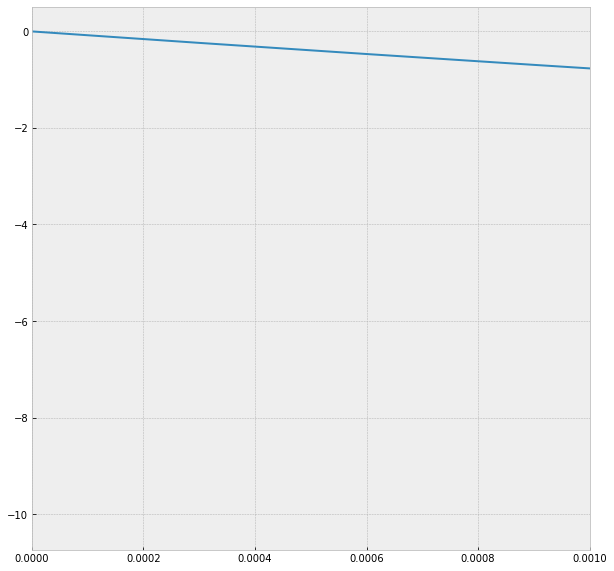

In [3]:
%matplotlib inline
K0 = 0.00019148936170212765
dt = 10
z = np.linspace(0, 0.1, 1000)
plt.figure(figsize=(10,10))
plt.plot(z, dFdz(z, K0, dt))
plt.xlim(0, 0.001)

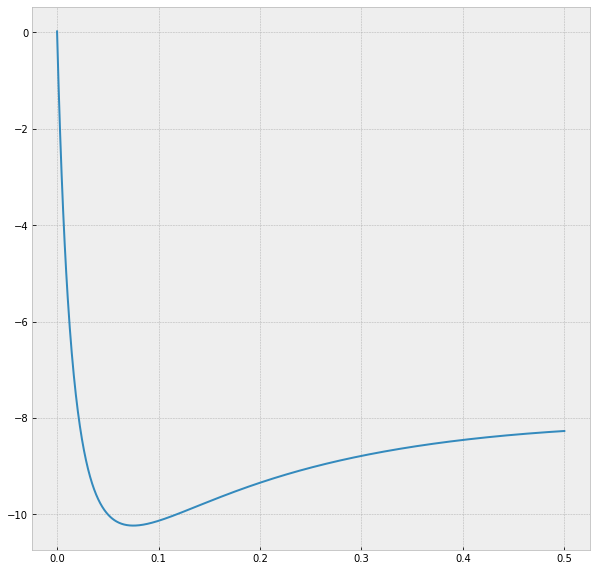

In [4]:
%matplotlib inline
K0 = 0.0001914
dt = 10
z = np.linspace(0, 0.5, 1000)
plt.figure(figsize=(10,10))
plt.plot(z, dFdz(z, K0, dt))

Text(0.5, 0, 'Z')

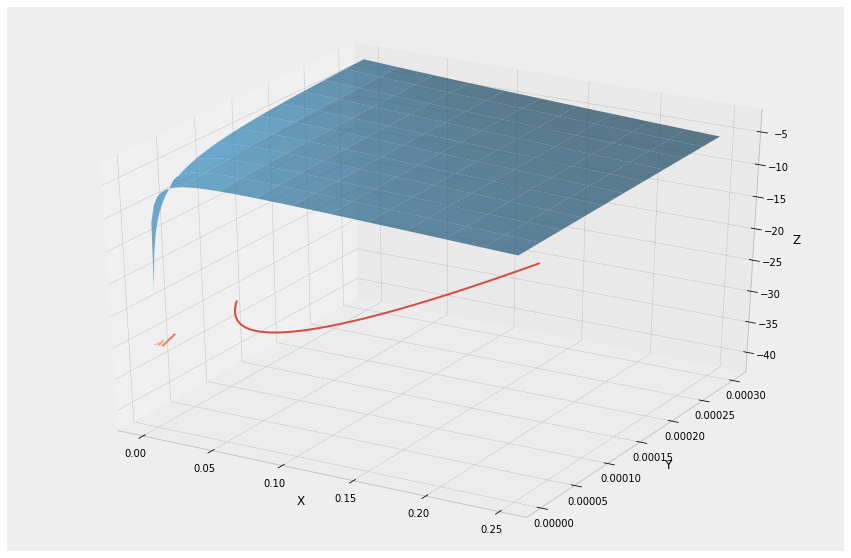

In [5]:
%matplotlib qt
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
#X, Y, Z = axes3d.get_test_data(0.05)
dt=10
X = np.linspace(0, 0.25, 100)
Y = np.linspace(1e-6, 3e-4, 100)
X, Y = np.meshgrid(X, Y)
Z = F(X,Y,dt)
Z = np.where( Z>1000, 1000,  Z)

ax.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.7)

cset = ax.contour(X, Y, Z, 10, zdir='z', offset=-30, cmap=cm.coolwarm)
ax.clabel(cset, inline=20, fontsize=10)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_zlim(-1, 100)

#ax.set_zlim(-100, 40)

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

In [11]:
%matplotlib qt
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
#X, Y, Z = axes3d.get_test_data(0.05)
dt=10
X = np.linspace(0, 0.1, 100)
Y = np.linspace(1e-6, 3e-4, 100)
X, Y = np.meshgrid(X, Y)
Z = dFdz(X,Y,dt)
Z = np.where( Z>1000, 1000,  Z)

ax.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.7)

cset = ax.contour(X, Y, Z, 10, zdir='z', offset=-30, cmap=cm.coolwarm)
ax.clabel(cset, inline=20, fontsize=10)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(-1, 100)

#ax.set_zlim(-100, 40)

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

(-1, 100)

In [81]:
%matplotlib qt
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
dt=10
X = np.linspace(0, 0.1, 100)
Y = np.linspace(1e-6, 3e-4, 100)
X, Y = np.meshgrid(X, Y)
Z = dFdz(X,Y,dt)
Z = np.where( Z>1000, 1000,  Z)

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=20, fontsize=10)

#ax.set_zlim(-100, 40)

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

<a list of 1 text.Text objects>

In [26]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [12]:
z = 0
K0 = 0
dt = 10
Kc = Alpha(z, K0) * (Alpha(z, K0) * dt +
                      z) / (2 * (dAdz(z, K0) * dt + 1)) - Diffu(z, K0)
print(Kc)

0.00019148936170212765


For $\frac{d}{dz}F = 0$, we have

$$b^2=\frac{a(a\Delta t + z)}{a'\Delta t +1}$$